## Assignment 7: Neural Networks using Keras and Tensorflow

Please see the associated document for questions

|  <font size=4>Name</font>  | <font size=4>Working Hours</font>   |
|  :----  | :----  |
| <font size=4>Dimitrios Koutsakis</font>   | <font size=4>8</font> |
| <font size=4>Bingcheng Chen</font>  | <font size=4>8</font> |

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [158]:
# pip install tensorflow

In [159]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
from keras.utils import to_categorical
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
from keras import layers

In [160]:
# Hyper-parameters data-loading and formatting
batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

# Load MNIST handwritten digit data
(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert lbl_train.shape == (60000,)
assert lbl_test.shape == (10000,)

# 'channels_first' means that the color channels of an image tensor are the first dimension in the tensor, followed by the spatial dimensions (height and width). An image tensor would have shape (samples, channels, height, width).
# 'channels_last' means that the color channels of an image tensor are the last dimension in the tensor, after the spatial dimensions. In the channels_last format, an image tensor would have shape (samples, height, width, channels).
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

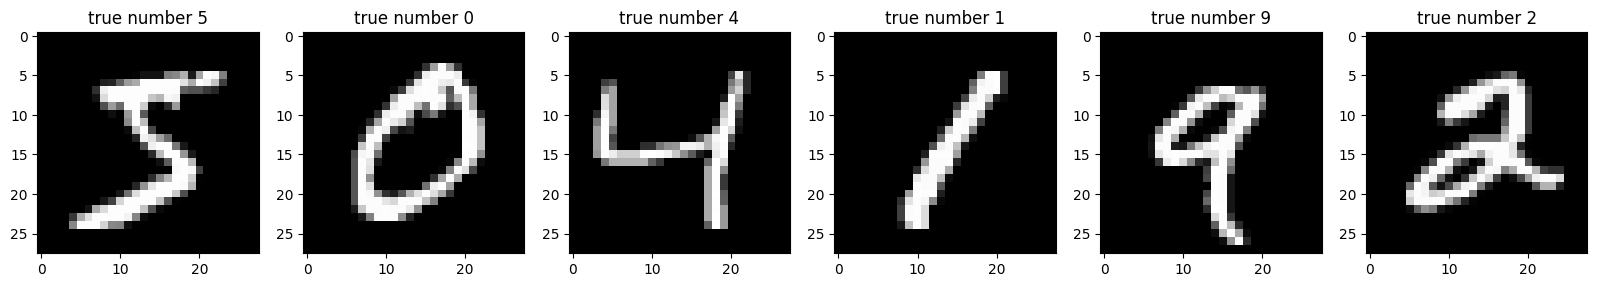

In [161]:
plt.figure(figsize=(20, 5))
# plot first few images in x_train dataset
for i in range(6):
    plt.subplot(1,6,i+1)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title('true number {}'.format(lbl_train[i]))
# show the figure
plt.show()

#### **1. Preprocessing**

In [162]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)

##### **Q1.1** Explain the data pre-processing highlighted in the notebook.

**Answer:** 
- First, convert the x data type from integers to 32-bit floating point number which is common used when training a neural network. This is because float32 provides sufficient precision, and also many modern processors are optimized for float32 operations.
- Second, since the pixel values for each image in the dataset are unsigned integers ranging from 0(black) to 255(white), the input features are scaled/normalised between 0.0 and 1.0. Rescaling can also help to prevent the model from being influenced too much by features with a large range of values.
- Third, y dataset was converted to binary class matrix (ten output neurons). The reason we set this is because we want the model to make a prediction for each possible class. Each output neuron corresponds to a different class, and the value of that neuron represents the probability that the input image belongs to that class.

#### **2. Network model, training, and changing hyper-parameters**

In [163]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 921us/step - loss: 0.4759 - accuracy: 0.8641 - val_loss: 0.2935 - val_accuracy: 0.9089
Epoch 2/10
469/469 [==============================] - 0s 916us/step - loss: 0.2220 - accuracy: 0.9349 - val_loss: 0.1948 - val_accuracy: 0.9408
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1696 - accuracy: 0.9513 - val_loss: 0.1564 - val_accuracy: 0.9505
Epoch 4/10
469/469 [==============================] - 0s 897us/step - loss: 0.1410 - accuracy: 0.9590 - val_loss: 0.1378 - val_accuracy: 0.9604
Epoch 5/10
469/469 [==============================] - 0s 814us/step - loss: 0.1195 - accuracy: 0.9652 - val_loss: 0.1429 - val_accuracy: 0.9576
Epoch 6/10
469/469 [==============================] - 0s 809us/step - loss: 0.1044 - accuracy: 0.9700 - val_loss: 0.1183 - val_accuracy: 0.9622
Epoch 7/10
469/469 [==============================] - 0s 806us/step - loss: 0.0930 - accuracy: 0.9723 - val_loss: 0.1029 - val_accuracy: 0

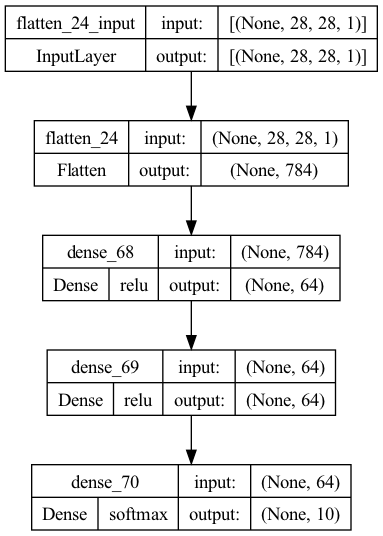

In [164]:
# Converts a Keras model to dot format and save to a file.
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [165]:
# get a summary of the model
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_68 (Dense)            (None, 64)                50240     
                                                                 
 dense_69 (Dense)            (None, 64)                4160      
                                                                 
 dense_70 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### **Q2.1** How many layers does the network in the notebook have? How many neurons does each layer have? What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? Why do the input and output layers have the dimensions they have?

**Answer:** 

According to the plot and summary of the model above, we can conclude,

+ There are 4 layers in the network, the input layer has 784 neurons, the two hidden layers both have 64 neurons and the output layer has 10 neurons.
+ The two hidden layers use activation function 'relu (rectified linear unit)', $f(x) = max(0,x)$, the reason we use this activation function is because it is computationally efficient, effective at reducing the impact of the vanishing gradient problem, and able to learn complex nonlinear relationships in the input data.
+ The output layer use activation function 'softmax', because 'Softmax' function converts a vector of values to a probability distribution which means the elements of the output vector are in range (0, 1) and sum to 1. In this case, this is what we want to output - the value of each neuron represents the confidence that the input image belongs to the corresponding number.
+ The total number of parameters for this network is 55050.
+ The input layer have the dimension $784 = 28*28$, this is because neural network models require the input to be a one-dimensional vector, thus 28x28 input image was flatten into a one-dimensional vector of length 784.
+ The output layer have the dimension 10, this is because the handwritten digit range from 0 to 9, therefore, we use 10 output neurons, one for each possible number.

##### **Q2.2** What loss function is used to train the network? What is the functional form (a mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

**Answer:**

The loss function used to train the network is 'categorical_crossentropy' function, it is commonly used when there are multiple label classes and one_hot representation in output. in this case, since we have 10 classes, thus it is appropriate to use this loss function. The mathematical expression of this function is as follows,

$Loss = - \frac{1}{N} \sum_{i=1}^N \sum_{c=1}^C \bold{1}_{y_{i} \in{C_{c}}}  log p_{model}[{y_{i} \in{C_{c}}}]$

where $N$ is the number of samples in the dataset, $C$ is the number of classes(10), $\bold{1}_{y_{i} \in{C_{c}}}$ is the indicator function that takes value 1 if the $i$-th instance belongs to class $c$, and 0 otherwise.
The $p_{model}[{y_{i} \in{C_{c}}}]$ is the probability predicted by the model for the 'i'th observation to belong to the 'c'th category.

The loss function computes the average negative log-likelihood of the predicted probability distribution over all instances in the dataset. It measures the difference between the true label distribution and the predicted label distribution and tries to minimize it during the training process.

A lower value of the loss function indicates that the model is making more accurate predictions. Conversely, a higher value of the loss function indicates that the model is making less accurate predictions.







##### **Q2.3** Train the network for 10 epochs and plot the training and validation accuracy for each epoch.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


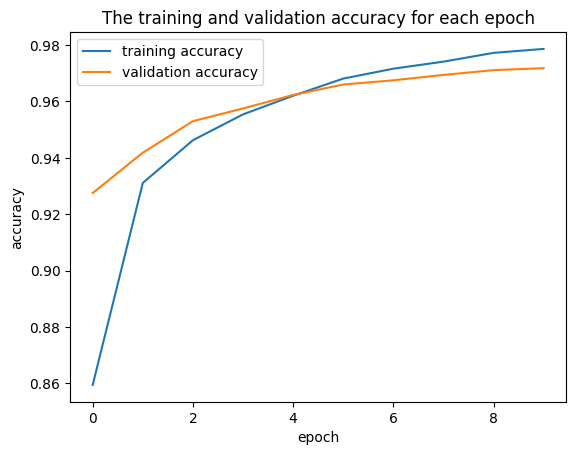

In [61]:
# list all data in history
print(fit_info.history.keys())

plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('The training and validation accuracy for each epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper left')
plt.show()

##### **Q2.4** Update the model to implement a three-layer neural network where the hidden layers have 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights(kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor. How close do you get to Hintons result? – If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)

In [ ]:
import numpy as np

epochs = 40
L2 = np.linspace(0.000001,0.001,5)

accuracy_matrix = np.zeros([3,5],dtype=np.float32)

for l2 in L2:
    for i in range(3):
        model = Sequential()
        model.add(Flatten())
        model.add(Dense(500, activation = 'relu', kernel_regularizer=keras.regularizers.L2(l2 = l2)))
        model.add(Dense(300, activation = 'relu',kernel_regularizer=keras.regularizers.L2(l2 = l2)))
        model.add(Dense(num_classes, activation='softmax'))
        
        model.compile(loss=keras.losses.categorical_crossentropy, 
                      optimizer=tensorflow.keras.optimizers.legacy.SGD(learning_rate = 0.1), 
                      metrics=['accuracy'])

        fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=0,
           validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        print('When l2 = {}, train No.{} network, Validation accuracy is {}'.format(l2, i, score[1]))
        accuracy_matrix[i][np.where(L2 == l2)[0][0]] = score[1]

When l2 = 1e-06, train No.0 network, Validation accuracy is 0.9825000166893005
When l2 = 1e-06, train No.1 network, Validation accuracy is 0.9815000295639038
When l2 = 1e-06, train No.2 network, Validation accuracy is 0.9822999835014343
When l2 = 0.00025075000000000005, train No.0 network, Validation accuracy is 0.9828000068664551
When l2 = 0.00025075000000000005, train No.1 network, Validation accuracy is 0.9819999933242798
When l2 = 0.00025075000000000005, train No.2 network, Validation accuracy is 0.983299970626831
When l2 = 0.0005005000000000001, train No.0 network, Validation accuracy is 0.983299970626831
When l2 = 0.0005005000000000001, train No.1 network, Validation accuracy is 0.9817000031471252
When l2 = 0.0005005000000000001, train No.2 network, Validation accuracy is 0.9812999963760376
When l2 = 0.0007502500000000002, train No.0 network, Validation accuracy is 0.9815000295639038
When l2 = 0.0007502500000000002, train No.1 network, Validation accuracy is 0.9829999804496765
Wh

In [ ]:
accuracy_matrix

array([[0.9825, 0.9828, 0.9833, 0.9815, 0.9815],
       [0.9815, 0.982 , 0.9817, 0.983 , 0.9783],
       [0.9823, 0.9833, 0.9813, 0.9818, 0.9803]], dtype=float32)

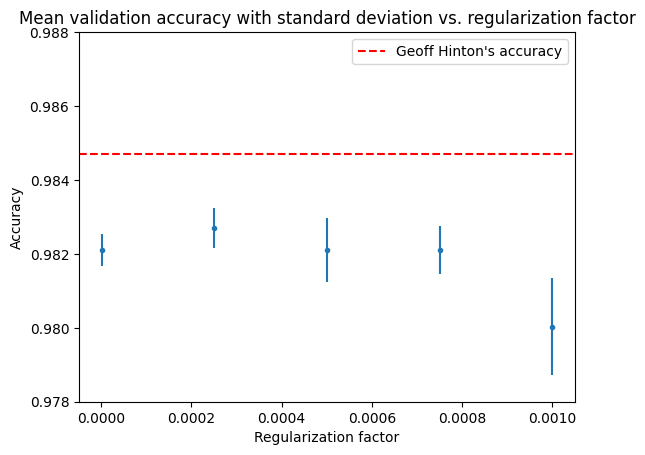

In [ ]:
accuracy_mean = np.mean(accuracy_matrix, axis=0)
accuracy_std = np.std(accuracy_matrix, axis=0)

plt.errorbar(L2, accuracy_mean, accuracy_std, linestyle='None', marker='.')
plt.axhline(y=0.9847, color = 'r', linestyle='--', label = "Geoff Hinton's accuracy")
plt.title('Mean validation accuracy with standard deviation vs. regularization factor', fontsize=12)
plt.ylabel('Accuracy')
plt.xlabel('Regularization factor')
plt.ylim(0.978,0.988)
plt.legend()

plt.show()

In [ ]:
Best_accuracy = np.max(accuracy_matrix)
print(f'The best accuracy we can get is {Best_accuracy}.')
rate = Best_accuracy/(0.9847)*100
print(f"The best accuracy we can get is {rate:.2f}% close to Geoff Hinton's accuracy.")

The best accuracy we can get is 0.983299970626831.
The best accuracy we can get is 99.86% close to Geoff Hinton's accuracy.


**Answer:** 

The accuracy is slightly smaller than Geoff Hinton's accuracy, this may happen since we set different values of learning rate, batch size and epochs.

#### **3. Convolutional layers**

##### **Q3.1** Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from the convolutional layers and layers that you used in previous questions, you must describe what they do. If you do not reach 99% accuracy, report your best performance, and explain your attempts and thought process.

##### **Attempt: Model 1 - 99.12%**

In [6]:
def build_model():
    # Initialize a sequential model object
    model = Sequential()  

    # Add a 2D convolutional layer with 20 filters, a kernel size of (5,5), ReLU activation.
    # The input shape of the layer is (28, 28, 1), corresponding to the size of images 28x28.
    # Add a max pooling layer with a pool size of (2,2) to downsample the feature maps.
    model.add(Conv2D(20,(5,5),activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2,2)))

    # Add a second 2D convolutional layer with 40 filters, a kernel size of (5,5).
    # The input shape of the layer is (20, 12, 12), corresponding to the output shape of the previous layer.
    model.add(Conv2D(40,(5,5),activation='relu', input_shape=(20, 12, 12)))
    model.add(MaxPooling2D((2,2)))

    # Flatten the output of the previous layer to feed it to a fully connected layer.
    model.add(Flatten())
    
    # Add a full connected layer with 100 units.
    model.add(Dense(100, activation = 'sigmoid'))

    # Add the output layer
    model.add(Dense(num_classes, activation='softmax'))
           
    model.compile(loss=keras.losses.categorical_crossentropy, 
                    optimizer=tensorflow.keras.optimizers.legacy.SGD(learning_rate = 0.1), 
                    metrics=['accuracy'])
    return model

new_model = build_model()
fit_info = new_model.fit(x_train, y_train,
    batch_size=128,
    epochs=60,
    verbose=1,
    validation_data=(x_test, y_test))
score = new_model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))


Epoch 1/60


2023-05-12 14:52:20.065069: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


  3/469 [..............................] - ETA: 17s - loss: 2.4830 - accuracy: 0.0859 

2023-05-12 14:52:21.056951: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18560000 exceeds 10% of free system memory.


469/469 [==============================] - 17s 35ms/step - loss: 0.6005 - accuracy: 0.8252 - val_loss: 0.2076 - val_accuracy: 0.9434
Epoch 2/60
469/469 [==============================] - 16s 34ms/step - loss: 0.1534 - accuracy: 0.9569 - val_loss: 0.1031 - val_accuracy: 0.9710
Epoch 3/60
469/469 [==============================] - 16s 35ms/step - loss: 0.1037 - accuracy: 0.9710 - val_loss: 0.0867 - val_accuracy: 0.9737
Epoch 4/60
469/469 [==============================] - 16s 34ms/step - loss: 0.0822 - accuracy: 0.9767 - val_loss: 0.0659 - val_accuracy: 0.9796
Epoch 5/60
469/469 [==============================] - 16s 34ms/step - loss: 0.0697 - accuracy: 0.9803 - val_loss: 0.0564 - val_accuracy: 0.9828
Epoch 6/60
469/469 [==============================] - 16s 34ms/step - loss: 0.0606 - accuracy: 0.9826 - val_loss: 0.0566 - val_accuracy: 0.9822
Epoch 7/60
469/469 [==============================] - 16s 34ms/step - loss: 0.0546 - accuracy: 0.9841 - val_loss: 0.0510 - val_accuracy: 0.9838
Epo

##### **Attempt: Model 2 - 99.59%**

This model is inspired by Jay Gupta's LeNet-5 v2.0 convolutional neural network model, [LeNet-5 v2.0 link](https://github.com/guptajay/Kaggle-Digit-Recognizer#results-2), our model is based on LeNet-5 v2.0.

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Create a data augmentation stage with rotations, zooms and image shift
datagen = ImageDataGenerator(
        rotation_range = 10, # Rotate images randomly by up to 10 degrees
        zoom_range = 0.1, # Zoom in or out by up to 10% 
        width_shift_range = 0.1,  # Shift the image horizontally by up to 10%
        height_shift_range = 0.1)  # Shift the image vertically by up to 10%

datagen.fit(x_train)

In [9]:
def build_model():

    model = Sequential()  

    # 1. Add 2 2D convolutional layer with 32 filters, each with a 5x5 kernel, and ReLU activation function to the model.
    # 2. Add a batch normalization layer, it works by normalizing the inputs to a layer, i.e., transforming them to have zero mean and unit variance.
    # This has the effect of stabilizing the distribution of inputs, reducing the effects of internal covariate shift, and allowing the use of higher learning rates.
    # 3. Add a max pooling layer with a pool size of (2,2) to downsample the feature maps.
    model.add(Conv2D(32,(5,5),activation='relu', input_shape=(28, 28, 1)))    
    model.add(Conv2D(32,(5,5),activation='relu', input_shape=(20, 12, 12)))
    model.add(BatchNormalization()) 
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    
    # Flatten the output of the previous layer to feed it to a fully connected layer.
    model.add(Flatten())

    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(128, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(84, activation = 'relu', kernel_regularizer=keras.regularizers.L2(l2 = 0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))


    model.add(Dense(num_classes, activation='softmax'))
           
    model.compile(loss=keras.losses.categorical_crossentropy, 
                    optimizer='adam', 
                    metrics=['accuracy'])
    return model

In [10]:
new_model = build_model()

# Define a learning rate scheduler to reduce the learning rate when the validation loss plateaus
variable_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)

fit_info = new_model.fit(x_train, y_train,
    batch_size=64,
    epochs=30,
    callbacks = [variable_learning_rate], # using the learning rate scheduler defined above as a callback to adjust the learning rate
    verbose=1,
    validation_data=(x_test, y_test))
score = new_model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/30


2023-05-13 17:53:23.674191: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


937/938 [============================>.] - ETA: 0s - loss: 0.9621 - accuracy: 0.9386

2023-05-13 17:54:51.900410: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


938/938 [==============================] - 90s 94ms/step - loss: 0.9616 - accuracy: 0.9387 - val_loss: 0.1031 - val_accuracy: 0.9848 - lr: 0.0010
Epoch 2/30
938/938 [==============================] - 91s 97ms/step - loss: 0.1228 - accuracy: 0.9778 - val_loss: 0.0913 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 3/30
938/938 [==============================] - 93s 100ms/step - loss: 0.1028 - accuracy: 0.9828 - val_loss: 0.0896 - val_accuracy: 0.9837 - lr: 0.0010
Epoch 4/30
938/938 [==============================] - 91s 97ms/step - loss: 0.0898 - accuracy: 0.9855 - val_loss: 0.0658 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 5/30
938/938 [==============================] - 91s 97ms/step - loss: 0.0855 - accuracy: 0.9871 - val_loss: 0.0962 - val_accuracy: 0.9824 - lr: 0.0010
Epoch 6/30
938/938 [==============================] - 91s 97ms/step - loss: 0.0767 - accuracy: 0.9890 - val_loss: 0.0671 - val_accuracy: 0.9906 - lr: 0.0010
Epoch 7/30
938/938 [==============================] - 90s 96ms/step 

##### **Q3.2** Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the application?

**Answer:**

**Differences**

1. In fully connected neural networks, each neuron in one layer is connected to every neuron in the next layer, resulting in a dense matrix of weights that needs to be learned during training. This can be computationally expensive and prone to overfitting.

2. In CNNs, each neuron in a layer is connected only to a small region of the input data, known as the local receptive field. This enables the network to learn local patterns, such as edges and textures, and reduces the number of parameters that need to be learned. This can result in faster training times or the ability to construct deeper networks with the same computational resources.

**Potential benefits**

1. Convolutional layers require fewer parameters than fully connected layers, which makes them more efficient and easier to train.
2. Convolutional layers are translation-invariant, which means they can recognize patterns regardless of their position in the image.
3. Convolutional layers are particularly effective in capturing spatial information and local patterns in images.
